**Financial Sentiment Analysis**

This is sentiment analysis on Financial Dataset . Data is from FiQA and Financial PhraseBank. It provides financial sentences with sentiment labels like positive, negative and neutral.

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence #unique id

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout, Embedding

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


**EDA**

In [ ]:
data = pd.read_csv("Financial_dataset.csv")
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [ ]:
# Checking the null values

data.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [ ]:
data["Sentiment"].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

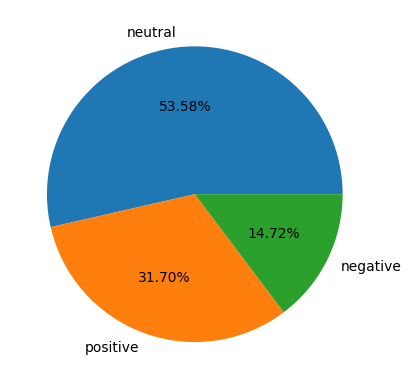

In [ ]:
plt.pie(data["Sentiment"].value_counts(),labels=["neutral","positive","negative"],autopct="%0.2f%%")
plt.show()

**Encoding**


In [ ]:
data["Sentiment"].replace({"negative":0,"positive":1,"neutral":2},inplace=True)

In [ ]:
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,1
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",1
3,According to the Finnish-Russian Chamber of Co...,2
4,The Swedish buyout firm has sold its remaining...,2


**World Cloud with Positive, Negative and Neutral Sentiment**

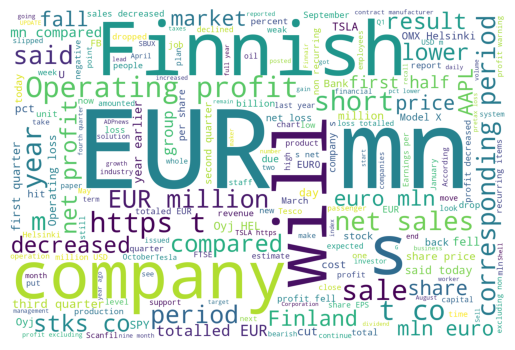

In [ ]:
wc = WordCloud(width=1500, height=1000,
               background_color="white",
               min_font_size=10)

wc.generate(" ".join(data[data["Sentiment"]==0]["Sentence"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

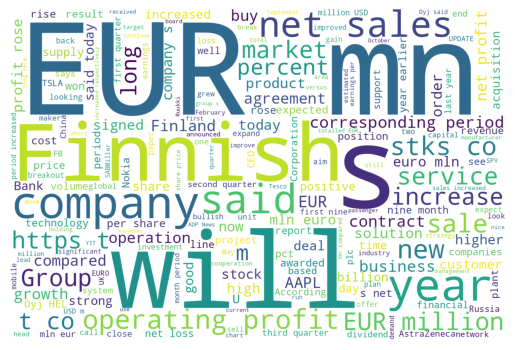

In [ ]:
wc = WordCloud(width=1500, height=1000,
               background_color="white",
               min_font_size=10)

wc.generate(" ".join(data[data["Sentiment"]==1]["Sentence"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

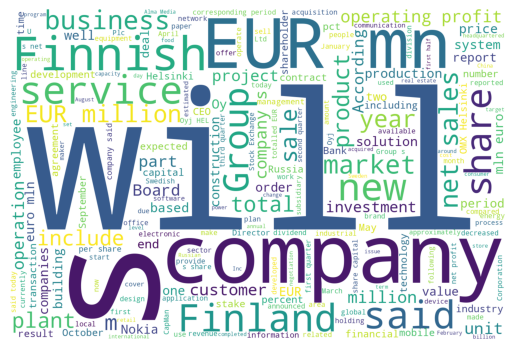

In [ ]:
wc = WordCloud(width=1500, height=1000,
               background_color="white",
               min_font_size=10)

wc.generate(" ".join(data[data["Sentiment"]==2]["Sentence"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

**Text Preprocessing**

In [ ]:
def clean_text(text):
  tokens = word_tokenize(text.lower())
  ftoken = [t for t in tokens if(t.isalpha())]
  stop = stopwords.words("english")
  ctoken = [t for t in ftoken if(t not in stop)]
  lemma = WordNetLemmatizer()
  ltoken = [lemma.lemmatize(t) for t in ctoken]
  return " ".join(ltoken)

In [ ]:
data["clean_Sentence"] = data["Sentence"].apply(clean_text)

In [ ]:
data.head()

,Sentence,Sentiment,clean_Sentence
0,The GeoSolutions technology will leverage Bene...,1,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0,esi low bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",1,last quarter componenta net sale doubled perio...
3,According to the Finnish-Russian Chamber of Co...,2,according chamber commerce major construction ...
4,The Swedish buyout firm has sold its remaining...,2,swedish buyout firm sold remaining percent sta...


In [ ]:
x = data["clean_Sentence"]
y = data["Sentiment"]

In [ ]:
# Splitting data into Training and Testing
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)


In [ ]:
sentlen = []

for sent in data["clean_Sentence"]:
  sentlen.append(len(word_tokenize(sent)))

data["SentLen"] = sentlen
data.head()

,Sentence,Sentiment,clean_Sentence,SentLen
0,The GeoSolutions technology will leverage Bene...,1,geosolutions technology leverage benefon gps s...,21
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0,esi low bk real possibility,5
2,"For the last quarter of 2010 , Componenta 's n...",1,last quarter componenta net sale doubled perio...,13
3,According to the Finnish-Russian Chamber of Co...,2,according chamber commerce major construction ...,9
4,The Swedish buyout firm has sold its remaining...,2,swedish buyout firm sold remaining percent sta...,14


In [ ]:
max(sentlen)

35

In [ ]:
tok = Tokenizer(char_level=False, split=" ")
#char_level	if True, every character will be treated as a token.

tok.fit_on_texts(xtrain)
tok.index_word

In [ ]:
vocab_len = len(tok.index_word)
vocab_len

7274

In [ ]:
seqtrain = tok.texts_to_sequences(xtrain) #step1
seqtrain

In [ ]:
seqmattrain = sequence.pad_sequences(seqtrain,maxlen=max(sentlen)) #step2
seqmattrain

array([[   0,    0,    0, ..., 1212,   18, 1629],
       [   0,    0,    0, ..., 2452, 1071,    7],
       [   0,    0,    0, ...,  596,  868, 2453],
       ...,
       [   0,    0,    0, ...,  667, 1384, 1368],
       [   0,    0,    0, ..., 3148,   18,  323],
       [   0,    0,    0, ...,   10, 1090,  268]], dtype=int32)

In [ ]:
seqmattrain.shape

(4089, 35)

In [ ]:
seqtest = tok.texts_to_sequences(xtest)
seqmattest = sequence.pad_sequences(seqtest,maxlen=max(sentlen))

In [ ]:
seqmattest.shape

(1753, 35)

**Model Building**

RNN


In [ ]:
 rnn = Sequential()

 rnn.add(Embedding(vocab_len+1,100,input_length=35, mask_zero=True))
 rnn.add(SimpleRNN(units=32, activation="tanh"))
 rnn.add(Dropout(0.2))
 rnn.add(Dense(units=32, activation="relu"))
 rnn.add(Dense(units=3, activation="softmax"))

 rnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

 rnn.fit(seqmattrain, ytrain, batch_size=25, epochs=50)



Epoch 1/50
164/164 [==============================] - 6s 26ms/step - loss: 0.9642 - accuracy: 0.5393
Epoch 2/50
164/164 [==============================] - 4s 26ms/step - loss: 0.5930 - accuracy: 0.7579
Epoch 3/50
164/164 [==============================] - 5s 32ms/step - loss: 0.2602 - accuracy: 0.8885
Epoch 4/50
164/164 [==============================] - 4s 26ms/step - loss: 0.1863 - accuracy: 0.9012
Epoch 5/50
164/164 [==============================] - 5s 28ms/step - loss: 0.1615 - accuracy: 0.9068
Epoch 6/50
164/164 [==============================] - 5s 30ms/step - loss: 0.1451 - accuracy: 0.9100
Epoch 7/50
164/164 [==============================] - 4s 26ms/step - loss: 0.1317 - accuracy: 0.9151
Epoch 8/50
164/164 [==============================] - 5s 32ms/step - loss: 0.1271 - accuracy: 0.9210
Epoch 9/50
164/164 [==============================] - 4s 27ms/step - loss: 0.1223 - accuracy: 0.9178
Epoch 10/50
164/164 [==============================] - 4s 26ms/step - loss: 0.1213 - accura

In [ ]:
ypred = rnn.predict(seqmattest)
ypred1 = ypred.argmax(axis=1)

55/55 [==============================] - 0s 5ms/step


In [ ]:
ypred1

array([2, 1, 2, ..., 2, 2, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ypred1,ytest))

              precision    recall  f1-score   support

           0       0.23      0.22      0.22       261
           1       0.49      0.66      0.56       422
           2       0.74      0.64      0.69      1070

    accuracy                           0.58      1753
   macro avg       0.49      0.51      0.49      1753
weighted avg       0.60      0.58      0.59      1753



LSTM


In [ ]:
rnn = Sequential()

rnn.add(Embedding(vocab_len+1,100, input_length=35, mask_zero=True))

rnn.add(LSTM(units=32, activation="tanh"))
rnn.add(Dense(units=32, activation="relu"))
rnn.add(Dropout(0.2))

rnn.add(Dense(units=3, activation="softmax"))

rnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

rnn.fit(seqmattrain, ytrain, batch_size=50, epochs=50)

Epoch 1/50
82/82 [==============================] - 10s 40ms/step - loss: 0.9898
Epoch 2/50
82/82 [==============================] - 3s 39ms/step - loss: 0.6788
Epoch 3/50
82/82 [==============================] - 3s 39ms/step - loss: 0.3788
Epoch 4/50
82/82 [==============================] - 4s 55ms/step - loss: 0.2636
Epoch 5/50
82/82 [==============================] - 3s 39ms/step - loss: 0.2141
Epoch 6/50
82/82 [==============================] - 3s 39ms/step - loss: 0.1816
Epoch 7/50
82/82 [==============================] - 3s 42ms/step - loss: 0.1691
Epoch 8/50
82/82 [==============================] - 4s 51ms/step - loss: 0.1536
Epoch 9/50
82/82 [==============================] - 3s 39ms/step - loss: 0.1440
Epoch 10/50
82/82 [==============================] - 3s 39ms/step - loss: 0.1421
Epoch 11/50
82/82 [==============================] - 4s 49ms/step - loss: 0.1362
Epoch 12/50
82/82 [==============================] - 4s 43ms/step - loss: 0.1297
Epoch 13/50
82/82 [=================

In [ ]:
ypred = rnn.predict(seqmattest)
ypred1 = ypred.argmax(axis=1)

55/55 [==============================] - 4s 17ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ypred1,ytest))

              precision    recall  f1-score   support

           0       0.29      0.30      0.29       240
           1       0.65      0.70      0.67       531
           2       0.73      0.69      0.71       982

    accuracy                           0.64      1753
   macro avg       0.56      0.56      0.56      1753
weighted avg       0.65      0.64      0.64      1753

